by ***Hoang Van Le***
# Opal Peak Times visualisation using heatmaps
The data are recordings of number of tap on and off at different bus location on 25 July, 8 August, 27 November 2016, and from 26 December 2016 to 1 January 2021.

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns

In [2]:
tap1 = pd.read_csv("data/Opal Tap On&Off/time_loc_20161121-27.csv")
tap2 = pd.read_csv("data/Opal Tap On&Off/time_loc_20161226-20170101.csv")
tap3 = pd.read_csv("data/Opal Tap On&Off/time-loc_20160725-31.csv")
tap4 = pd.read_csv("data/Opal Tap On&Off/time-loc_20160808-14.csv")

Splitting the data to multiple dataframes by tap on and off:

In [3]:
bus_off_1 = tap1[(tap1['mode']=="bus") & (tap1['tap']=="off")]
bus_off_2 = tap2[(tap2['mode']=="bus") & (tap2['tap']=="off")]
bus_off_3 = tap3[(tap3['mode']=="bus") & (tap3['tap']=="off")]
bus_off_4 = tap4[(tap4['mode']=="bus") & (tap4['tap']=="off")]

bus_on_1 = tap1[(tap1['mode']=="bus") & (tap1['tap']=="on")]
bus_on_2 = tap2[(tap2['mode']=="bus") & (tap2['tap']=="on")]
bus_on_3 = tap3[(tap3['mode']=="bus") & (tap3['tap']=="on")]
bus_on_4 = tap4[(tap4['mode']=="bus") & (tap4['tap']=="on")]


Function to list common locations appeared in two series:

In [4]:
def commonPostcodes(x,y):
    fin = [postcode for postcode in x if postcode in y]
    return fin

Looking to common locations (PostCodes) in all dataframes - locations that appeeared in ll dataframes and in both tap on and off:

In [5]:
#Common bus location tap off
commoff_bus_loc = commonPostcodes(set(bus_off_1['loc']), set(bus_off_2['loc']))
commoff_bus_loc = commonPostcodes(commoff_bus_loc, set(bus_off_3['loc']))
commoff_bus_loc = commonPostcodes(commoff_bus_loc, set(bus_off_4['loc']))

#Common bus location tap on
common_bus_loc = commonPostcodes(set(bus_on_1['loc']), set(bus_on_2['loc']))
common_bus_loc = commonPostcodes(common_bus_loc, set(bus_on_3['loc']))
common_bus_loc = commonPostcodes(common_bus_loc, set(bus_on_4['loc'])) 

#common bus location in all datasets both tap on and off
com_bus_loc = commonPostcodes(common_bus_loc, commoff_bus_loc)

Looking for the more requently recorded location in tap1:

In [6]:
#count (the number of rows) common bus location in tap1
count_on = []
count_off = []
max_on = 0
max_off = 0
loc_max_on = ""
loc_max_off = ""
for i in com_bus_loc:
    temp_count_on = 0
    temp_count_off = 0
    for j in bus_off_1['loc']:
        if j == i:
            temp_count_off = temp_count_off + 1
            if temp_count_off > max_off:
                max_off = temp_count_off
                loc_max_off = i
    count_off.append(temp_count_off)
    for j in bus_on_1['loc']:
        if j == i:
            temp_count_on = temp_count_on + 1
            if temp_count_on > max_on:
                max_on = temp_count_on
                loc_max_on = i
    count_on.append(temp_count_on)

In [7]:
print(len(count_on), max(count_on), len(count_off), max(count_off))
print(loc_max_on, loc_max_off)

216 665 216 665
2000 2000


### Choosing a location
The most frequently recorded location in tap1 was 2000 at 665 counts in both mode tap on and off. We decide to work closely with this location from here.
Creating dataframes for tap on location 2000 in tap1 and tap off location 2000 in tap1:

In [8]:
result_on = bus_on_1[bus_on_1['loc']=="2000"]
result_off = bus_off_1[bus_off_1['loc']=="2000"]

Our idea is to create heatmaps to see the traffic trend of people using buses in those areas. Below are the steps we did to make 3 heatmaps:<br>
(1) heatmap for the traffic tapping on.<br>
(2) heatmap for the traffic tapping off.<br>
(3) heatmap for the differences (on-off).

In [9]:
Date = []
for i in result_on['date']:
    Date.append(str(i) + " ")

In [10]:
dateandtime = Date + result_on['time']

We need a datetime column again.

In [12]:
import warnings
warnings.filterwarnings('ignore')
import datetime

DateTime = []
for i in dateandtime:
    d = datetime.datetime.strptime(i, "%Y%m%d %H:%M")
    DateTime.append(pd.to_datetime(d))

In [13]:
result_on['DateTime'] = DateTime

In [14]:
result_on.set_index('DateTime', inplace = True)


In [15]:
on_hr = result_on['count'].resample('H').sum()

In [16]:
time = on_hr.index.hour

In [17]:
day = pd.to_datetime([d.date() for d in on_hr.index])
dayname = day.day_name()
dayname

Index(['Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday', 'Monday',
       'Monday', 'Monday', 'Monday',
       ...
       'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday', 'Sunday'],
      dtype='object', length=168)

In [18]:
on_hr = pd.DataFrame(on_hr)

In [19]:
on_hr['Day Of Week'] = dayname
on_hr['Hour of day'] = time

In [20]:
data = on_hr.pivot(index="Hour of day", columns = "Day Of Week", values = "count")
data.head()

Day Of Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour of day,,,,,,,
0,2421,733,2254,556,1233,867,839
1,1480,424,1737,456,849,488,583
2,1601,348,1643,381,691,344,408
3,977,208,1385,167,453,167,230
4,233,150,280,177,137,124,114


Making changes to the data so that we can develop heatmaps.

In [21]:
order_col = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data = data.reindex(order_col, axis=1)
data.head()

Day Of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour of day,,,,,,,
0,733,867,839,1233,2421,2254,556
1,424,488,583,849,1480,1737,456
2,348,344,408,691,1601,1643,381
3,208,167,230,453,977,1385,167
4,150,124,114,137,233,280,177


### Heatmap for traffic tapping on
*Interpretation at the end of section.*

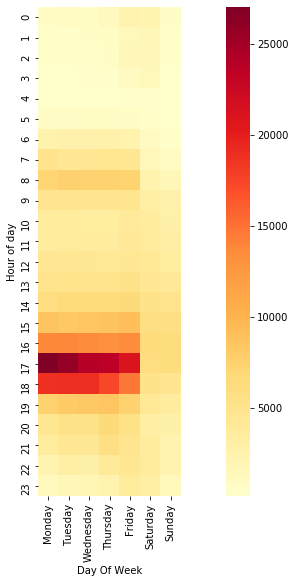

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
ax = sns.heatmap(data, square = True, cmap = 'YlOrRd')
plt.show()

Repeating the process for tap off data.

In [25]:
Date = []
for i in result_off['date']:
    Date.append(str(i) + " ")

In [26]:
dateandtime = Date + result_off['time']

In [27]:
DateTime = []
for i in dateandtime:
    d = datetime.datetime.strptime(i, "%Y%m%d %H:%M")
    DateTime.append(pd.to_datetime(d))

In [28]:
result_off['DateTime'] = DateTime

In [29]:
result_off.set_index('DateTime', inplace = True)

In [30]:
off_hr = result_off['count'].resample('H').sum()

In [31]:
time = off_hr.index.hour
day = pd.to_datetime([d.date() for d in on_hr.index])
dayname = day.day_name()

In [32]:
off_hr = pd.DataFrame(off_hr)
off_hr.head()

,count
DateTime,
2016-11-21 00:00:00,195
2016-11-21 01:00:00,135
2016-11-21 02:00:00,108
2016-11-21 03:00:00,127
2016-11-21 04:00:00,191


In [33]:
off_hr['Day Of Week'] = dayname
off_hr['Hour of day'] = time
off_hr.head()

,count,Day Of Week,Hour of day
DateTime,,,
2016-11-21 00:00:00,195,Monday,0
2016-11-21 01:00:00,135,Monday,1
2016-11-21 02:00:00,108,Monday,2
2016-11-21 03:00:00,127,Monday,3
2016-11-21 04:00:00,191,Monday,4


In [34]:
data = off_hr.pivot(index="Hour of day", columns = "Day Of Week", values = "count")
data.head()

Day Of Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour of day,,,,,,,
0,623,195,739,209,327,233,250
1,277,135,387,122,150,119,146
2,261,108,274,96,158,80,101
3,190,127,190,54,178,135,90
4,286,191,147,183,216,220,228


In [35]:
order_col = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data = data.reindex(order_col, axis=1)
data.head()

Day Of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour of day,,,,,,,
0,195,233,250,327,623,739,209
1,135,119,146,150,277,387,122
2,108,80,101,158,261,274,96
3,127,135,90,178,190,190,54
4,191,220,228,216,286,147,183


### Heatmap for traffic tapping off
*Interpretation at the end of section.*

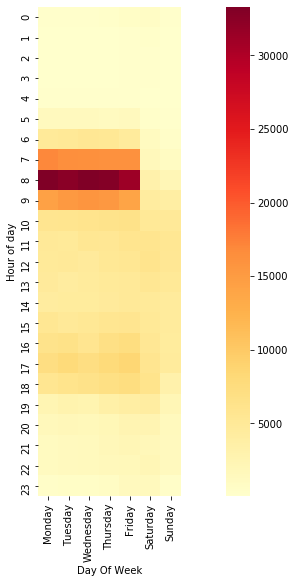

In [36]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(data, square = True, cmap = 'YlOrRd')
plt.show()

And once again

In [37]:
result_on_off = pd.DataFrame(result_on['count']-result_off['count'])

In [38]:
on_off_hr = result_on_off['count'].resample('H').sum()

In [39]:
on_off_hr = pd.DataFrame(on_off_hr)
on_off_hr.head()

,count
DateTime,
2016-11-21 00:00:00,538.0
2016-11-21 01:00:00,289.0
2016-11-21 02:00:00,240.0
2016-11-21 03:00:00,81.0
2016-11-21 04:00:00,4.0


In [40]:
on_off_hr['Day Of Week'] = dayname
on_off_hr['Hour of day'] = time
on_off_hr.head()

,count,Day Of Week,Hour of day
DateTime,,,
2016-11-21 00:00:00,538.0,Monday,0
2016-11-21 01:00:00,289.0,Monday,1
2016-11-21 02:00:00,240.0,Monday,2
2016-11-21 03:00:00,81.0,Monday,3
2016-11-21 04:00:00,4.0,Monday,4


In [41]:
data = on_off_hr.pivot(index="Hour of day", columns = "Day Of Week", values = "count")
data.head()

Day Of Week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hour of day,,,,,,,
0,1798.0,538.0,1515.0,347.0,906.0,634.0,589.0
1,1203.0,289.0,1350.0,334.0,699.0,369.0,437.0
2,1340.0,240.0,1369.0,202.0,533.0,148.0,217.0
3,787.0,81.0,1195.0,44.0,275.0,122.0,53.0
4,-53.0,4.0,133.0,43.0,-39.0,-47.0,-63.0


In [42]:
data = data.reindex(order_col, axis=1)
data.head()

Day Of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Hour of day,,,,,,,
0,538.0,634.0,589.0,906.0,1798.0,1515.0,347.0
1,289.0,369.0,437.0,699.0,1203.0,1350.0,334.0
2,240.0,148.0,217.0,533.0,1340.0,1369.0,202.0
3,81.0,122.0,53.0,275.0,787.0,1195.0,44.0
4,4.0,-47.0,-63.0,-39.0,-53.0,133.0,43.0


### Heatmap for traffic remaining in loc 2000 via bus
*Interpretation at the end of section.*

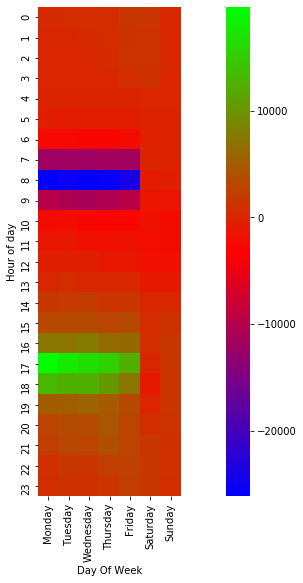

In [43]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(data, square = True, cmap = 'brg')
plt.show()

***Interpretation:***
* Both tap on and off peaked during weekdays. The traffic seemed a lot less during weekend.
* While tap on peaked at at around 5pm from Monday to Friday (highest on Monday), tap off peaked at 8am in the morning. It's quite consistent from Monday to Friday. It's interesting that the number of tap off peaked at 8am in the morning, meaning there were high traffic leaving the areas (postcode 2000) at 8 am in the morning. Given that it's the city area, it seemed sensible.
* The heatmap for the differences (tap on - tap off) shows the traffic flow in and out the areas by buses during that week in those areas. Traffic comming in peaked at around 5pm from Monday to Friday. Whereas the traffic going out peaked at 8 am in ther morning from Monday to Friday. The traffic during weekend seemed stable, and below 0, meaning people were leaving by bus more than they were coming in.